<a href="https://colab.research.google.com/github/sagarrokad1/LGMVIP-DataScience/blob/main/TASK-6%20Intermediate%20Level/LGM_VIP_October_2021_TASK_6_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

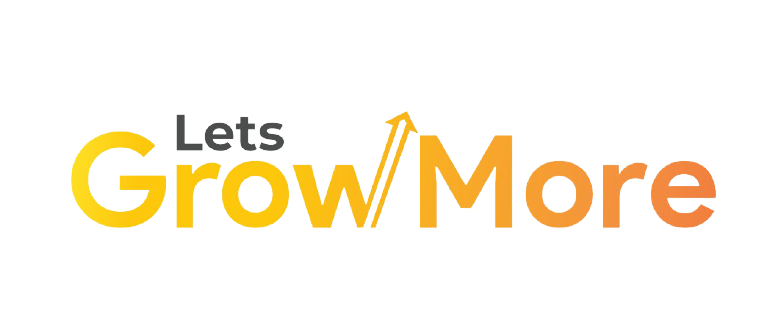


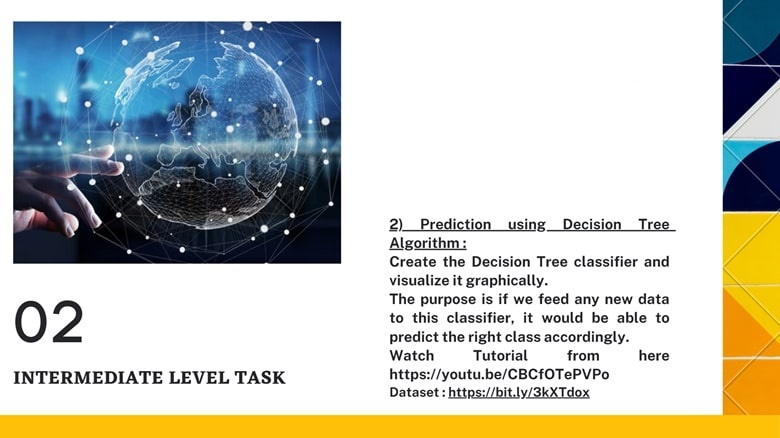


###**Problem Statement:**

Prediction using Decission Tree Algorithm. Creating the Decission Tree classifier and Visualizing it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.



### **Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Importing the Dataset**

In [ ]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### **Dropping the ID column**

In [ ]:
df.drop('Id',axis=1,inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **Exploring the Dataset**

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### **Data Visualization**

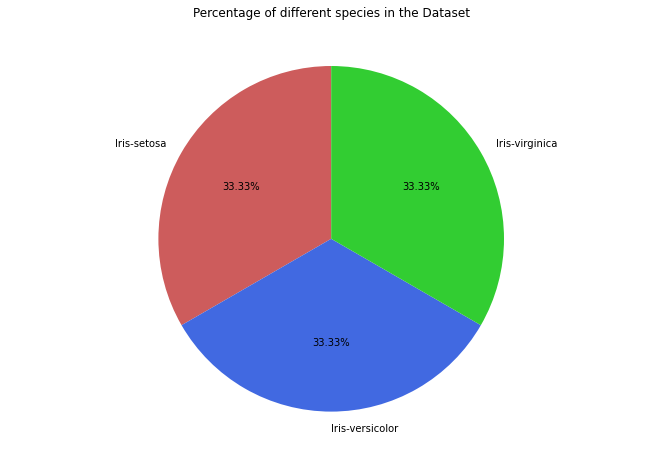

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['indianred','royalblue','limegreen']
sp = df['Species'].unique()
ct = df['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.2f%%', colors=colors, startangle=90)
plt.title('Percentage of different species in the Dataset')
plt.show()

Text(0.5, 1.0, 'Species vs Sepal Length')

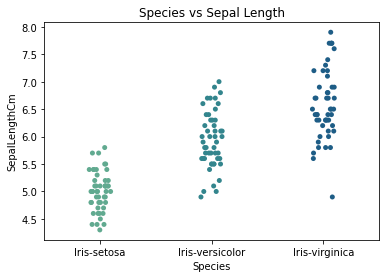

In [ ]:
sns.stripplot(x='Species', y='SepalLengthCm', data=df, palette='crest')
plt.title('Species vs Sepal Length')

Text(0.5, 1.0, 'Species vs Sepal Width')

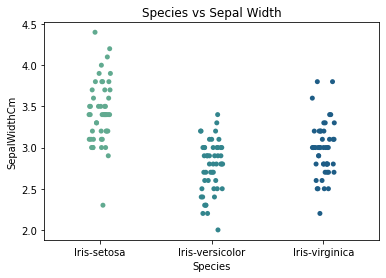

In [ ]:
sns.stripplot(x='Species', y='SepalWidthCm', data=df, palette='crest')
plt.title('Species vs Sepal Width')

Text(0.5, 1.0, 'Species vs Petal Length')

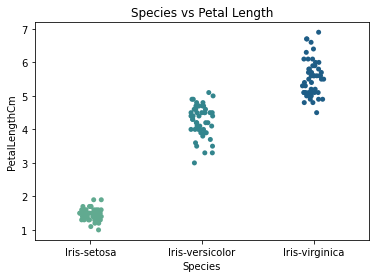

In [ ]:
sns.stripplot(x='Species', y='PetalLengthCm', data=df, palette='crest')
plt.title('Species vs Petal Length')

Text(0.5, 1.0, 'Species vs Petal Width')

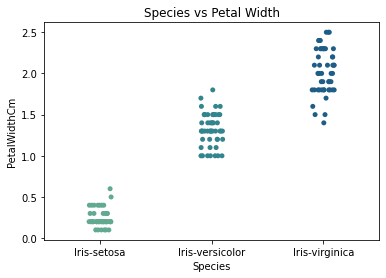

In [ ]:
sns.stripplot(x='Species', y='PetalWidthCm', data=df, palette='crest')
plt.title('Species vs Petal Width')

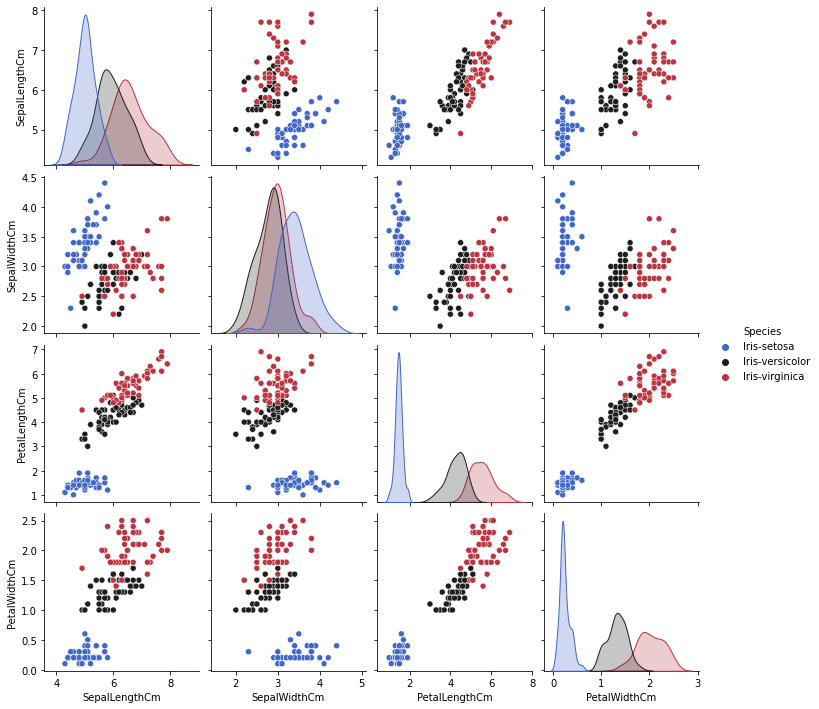

In [ ]:
sns.pairplot(df, hue='Species', palette='icefire')
plt.show()

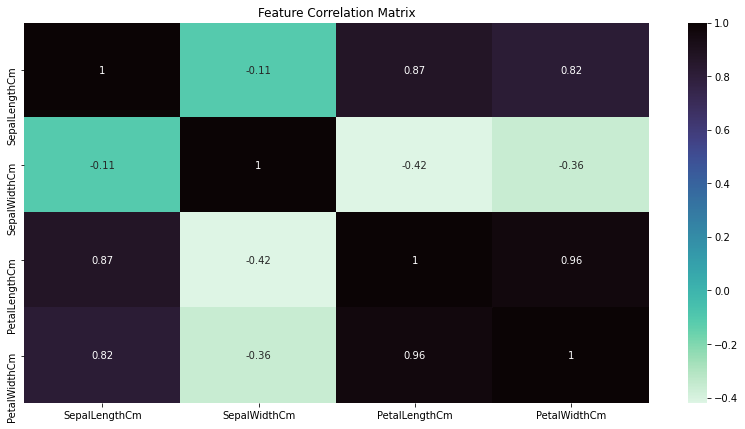

In [ ]:
plt.figure(figsize=(14, 7))
matrix = df.corr()
corMat = sns.heatmap(matrix, annot=True, cmap="mako_r")
corMat.set_title("Feature Correlation Matrix")
plt.show()

### **Splitting dataset into independent and dependent variables**

In [ ]:
X = df.drop(['Species'], axis=1)
Y = df['Species']

### **Splitting the data into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

### **Creating the Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy", random_state=20)

### **Training the Decision Tree Classifier**

In [ ]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

### **Predicting the output using testing set**

In [ ]:
Y_pred = dtc.predict(X_test)

### **Assessing the performance of the model**

In [ ]:
dfc = df.copy()
dfc = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
dfc.reset_index(inplace = True, drop = True)
dfc.sample(10)

,Actual,Predicted
38,Iris-versicolor,Iris-versicolor
35,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
13,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
15,Iris-setosa,Iris-setosa
20,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa


In [ ]:
from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy Score : {}'.format(accuracy))
print('Recall :{}'.format(metrics.recall_score(Y_test, Y_pred, average='macro')))
print('Precision :{}'.format(metrics.precision_score(Y_test, Y_pred, average='macro')))

Accuracy Score : 0.9777777777777777
Recall :0.9814814814814815
Precision :0.9722222222222222


In [ ]:
print('Classification Report:')
print(metrics.classification_report(Y_test, Y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
print('Confusion Matrix:\n')
print(metrics.confusion_matrix(Y_test, Y_pred))

Confusion Matrix:

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


Heatmap:

AxesSubplot(0.125,0.125;0.62x0.755)


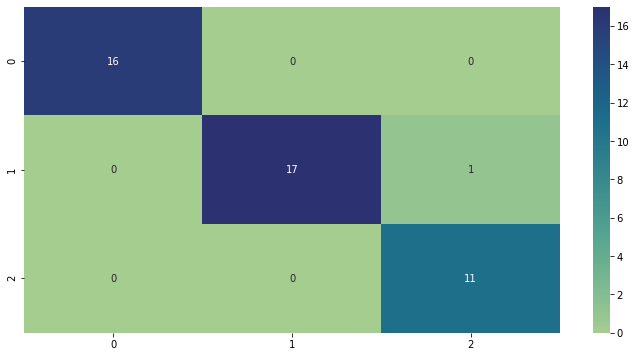

In [ ]:
print('Heatmap:\n')
plt.figure(figsize=(12, 6))
print(sns.heatmap(metrics.confusion_matrix(Y_test, Y_pred), annot = True, cmap = 'crest'))

### **Plotting the Decision Tree**

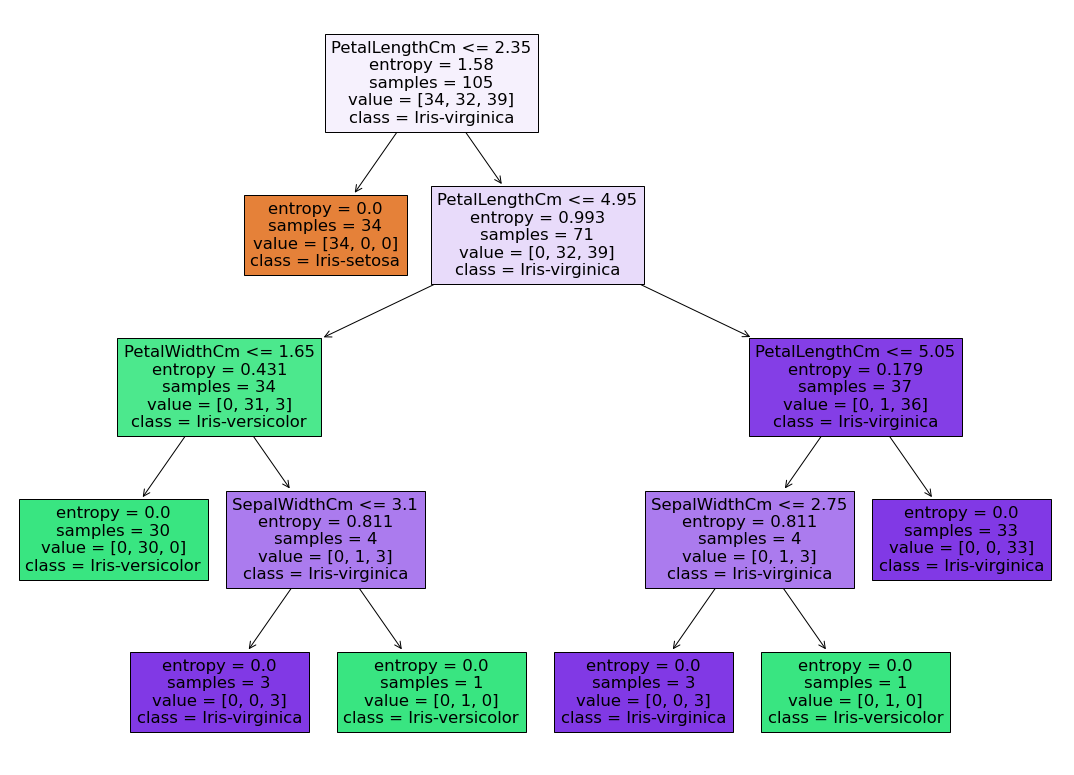

In [ ]:
features = df.columns[:-1]
classes = df['Species'].unique().tolist()

from sklearn.tree import plot_tree
plt.figure(figsize=(19, 14))
plot_tree(dtc, feature_names=features, class_names=classes, filled=True)
plt.show()